# HW3: Handwritten digits recognition using Neural Networks in Keras

## Experiment overview

In this homework we will build a [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) and a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network/) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

The goal is to learn to classify noisy hand-written digit images.

![digits_recognition_mlp.png](https://github.com/trekhleb/machine-learning-experiments/blob/master/demos/src/images/digits_recognition_mlp.png?raw=1)

## Setup (do not modify): Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [ ]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
#print('Keras version:', tf.keras.)

Python version: 3.10.12
Tensorflow version: 2.12.0


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [ ]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [ ]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [ ]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
num_classes = 10
input_shape = (28, 28, 1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [ ]:
y_train[0]

5

In [ ]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows:

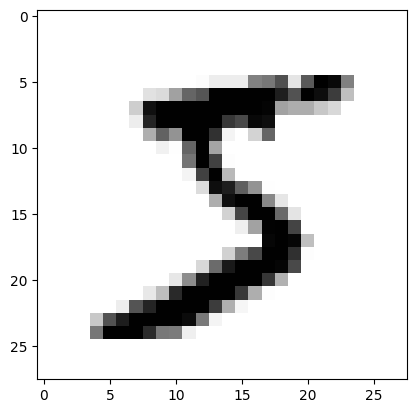

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

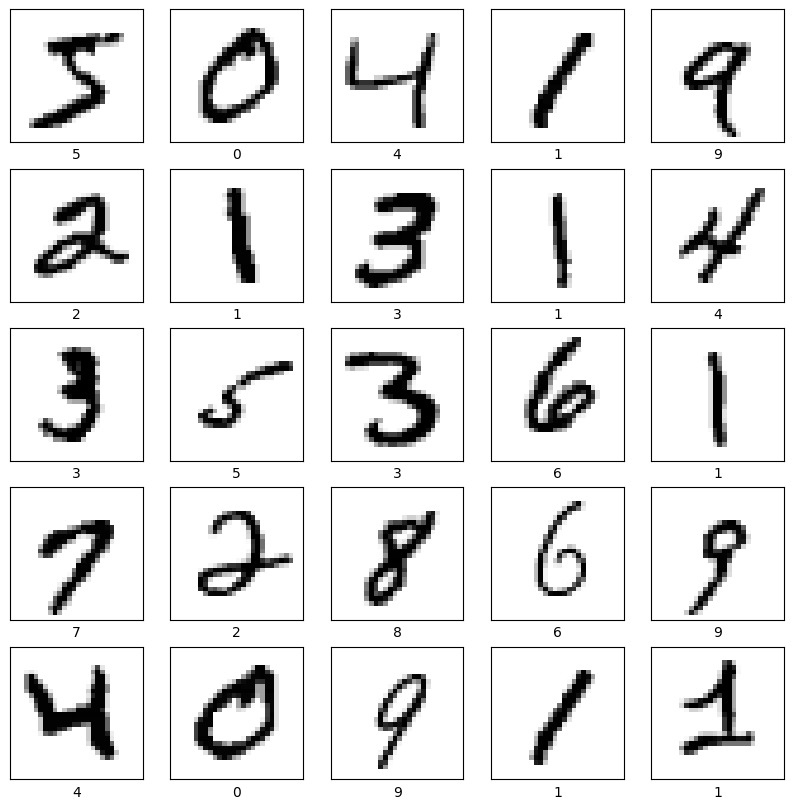

In [ ]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [ ]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [ ]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

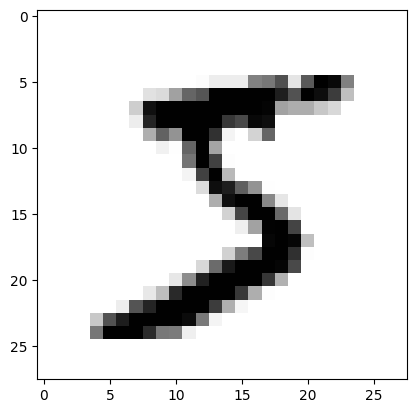

In [ ]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

## Question 1 (4pts): Build the MLP model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers (really 3 layers of actual network), and pre-processing layer 1:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `16` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to add L2 regularization to control overfitting of the model. Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).


**TODO**:
- Experiment with different values of hidden neurons from 8 to 128, to identify optimal number for this dataset.
- Experiment with different activation functions (sigmoid, tanh, linear, relu), to select optimal activation for this problem.
- Save the best configuration.

In [ ]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=32,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


Q1


In [ ]:
def create_mlp_model(first_hidden_neurons, second_hidden_neurons, first_activation, second_activation):
    model = tf.keras.models.Sequential()

    # Flatten layer
    model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))

    # Activation function mapping
    activations = {'sigmoid': tf.keras.activations.sigmoid,
                   'tanh': tf.keras.activations.tanh,
                   'linear': tf.keras.activations.linear,
                   'relu': tf.keras.activations.relu}

    # First dense layer
    model.add(tf.keras.layers.Dense(units=first_hidden_neurons,
                                    activation=activations[first_activation],
                                    kernel_regularizer=tf.keras.regularizers.l2(0.002)))

    # Second dense layer
    model.add(tf.keras.layers.Dense(units=second_hidden_neurons,
                                    activation=activations[second_activation],
                                    kernel_regularizer=tf.keras.regularizers.l2(0.002)))

    # Output layer
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

    return model


In [ ]:

  def fine_tune_mlp():
    best_val_accuracy = 0
    best_configuration = None
    best_model = None
    neuron_counts = [8, 16, 32, 64, 128]
    activations = ['sigmoid', 'tanh', 'linear', 'relu']

    for neurons_first_layer in neuron_counts:
        for neurons_second_layer in neuron_counts:
            for activation_first_layer in activations:
                for activation_second_layer in activations:
                    print(f"Testing configuration: {neurons_first_layer}, {neurons_second_layer}, {activation_first_layer}, {activation_second_layer}")
                    model = create_mlp_model(neurons_first_layer, neurons_second_layer, activation_first_layer, activation_second_layer)
                    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                    history = model.fit(x_train_normalized, y_train, epochs=3, validation_data=(x_test_normalized, y_test))
                    val_accuracy = history.history['val_accuracy'][-1]

                    if val_accuracy > best_val_accuracy:
                        best_val_accuracy = val_accuracy
                        best_configuration = (neurons_first_layer, neurons_second_layer, activation_first_layer, activation_second_layer)
                        best_model = model

    best_model.save('optimized_mlp_model.h5')
    return best_configuration


In [20]:
params_mlp = fine_tune_mlp()

Testing configuration: 8, 8, sigmoid, sigmoid
Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 1.7987 - accuracy: 0.5549 - val_loss: 1.3733 - val_accuracy: 0.7044
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1772 - accuracy: 0.7763 - val_loss: 1.0031 - val_accuracy: 0.8244
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9197 - accuracy: 0.8318 - val_loss: 0.8325 - val_accuracy: 0.8513
Testing configuration: 8, 8, sigmoid, tanh
Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1069 - accuracy: 0.7425 - val_loss: 0.7071 - val_accuracy: 0.8462
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6315 - accuracy: 0.8688 - val_loss: 0.5559 - val_accuracy: 0.8869
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5226 - accuracy: 0.8948 - val_loss: 0.4859 - val_accuracy: 0.9008
Testing configuration: 8, 8, sigmoid, linear
Epoch 1

In [21]:
params_mlp

(64, 32, 'relu', 'tanh')

**Answer**

Best parameters:

number of hidden neurons: Input layer: 64, Hidden layer: *32*

activation function: Input layer: relu, Hidden layer: tanh

Accuracy: 0.9678

## Question 2 (6pts): Build the ConvNet model

See an user-friendly to keras and convnet configuration here:
https://victorzhou.com/blog/keras-cnn-tutorial/


**TO DO**
- Experiment with adding more convolutional layers from 1 to 3 (currently only 1 convolution layer is used). Observe what happens to model parameters with more convolutions and pooling (sub-sampling).
- Experiment with dropout parameters from 0 to 0.5
- Experiment with different activation functions: linear, sigmoid, tanh
- Save the best configuration, write down your conclusions/explanation in comments


In [22]:
model2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model2.summary()

Model: "sequential_401"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten_401 (Flatten)       (None, 2704)              0         
                                                                 
 dropout (Dropout)           (None, 2704)              0         
                                                                 
 dense_1203 (Dense)          (None, 10)                27050     
                                                                 
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
________________________________________________

Here is our model summary so far.

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

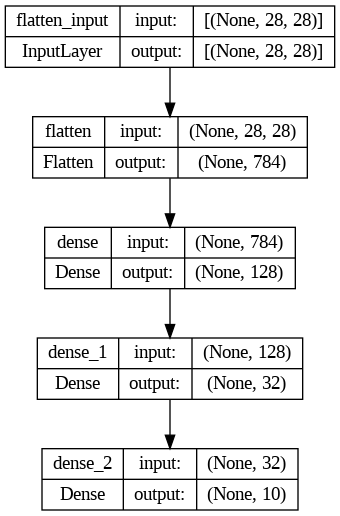

In [23]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

Q2

In [24]:
def build_cnn_model(num_conv_layers, dropout_rate, activation_func):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28, 1)))

    # Adding convolutional layers
    for i in range(num_conv_layers):
        model.add(tf.keras.layers.Conv2D(filters=32 * (2 ** i), kernel_size=(3, 3), activation=activation_func))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())

    # Adding dropout layer
    model.add(tf.keras.layers.Dropout(dropout_rate))

    # Output layer
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model


In [25]:
def fine_tune_cnn():
    best_val_accuracy = 0
    best_params = []
    saved_model = None

    for num_layers in range(1, 4):
        for dropout_rate in np.arange(0, 0.51, 0.1):
            for activation in ['sigmoid', 'tanh', 'linear']:
                print(f"Current params: Layers={num_layers}, Dropout={dropout_rate}, Activation={activation}")
                model = build_cnn_model(num_layers, dropout_rate, activation)
                model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

                history = model.fit(x_train_normalized, y_train, epochs=3,
                                    validation_data=(x_test_normalized, y_test))

                if history.history['val_accuracy'][-1] > best_val_accuracy:
                    best_val_accuracy = history.history['val_accuracy'][-1]
                    best_params = [num_layers, dropout_rate, activation]
                    saved_model = model

    saved_model.save('best_cnn_model.h5')
    return best_params


In [26]:
params_cnn = fine_tune_cnn()

Current params: Layers=1, Dropout=0.0, Activation=sigmoid
Epoch 1/3
1875/1875 [==============================] - 40s 21ms/step - loss: 0.7203 - accuracy: 0.7723 - val_loss: 0.3694 - val_accuracy: 0.8841
Epoch 2/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3536 - accuracy: 0.8956 - val_loss: 0.2732 - val_accuracy: 0.9236
Epoch 3/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2744 - accuracy: 0.9186 - val_loss: 0.2535 - val_accuracy: 0.9261
Current params: Layers=1, Dropout=0.0, Activation=tanh
Epoch 1/3
1875/1875 [==============================] - 37s 19ms/step - loss: 0.2719 - accuracy: 0.9225 - val_loss: 0.1356 - val_accuracy: 0.9614
Epoch 2/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1141 - accuracy: 0.9674 - val_loss: 0.0902 - val_accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0809 - accuracy: 0.9770 - val_loss: 0.0788 - val_accuracy: 0.9757
Current params: L

In [27]:
params_cnn


[2, 0.4, 'tanh']

**Answer**


Best parameters:

Layers: 2, with the first containing 16 filters and the second 32 filters.
Dropout Rate: 0.4
Activation Function: Tanh.
Accuracy: 0.9876.
Explanation: For simpler datasets like MNIST, a network with a limited number of layers often yields better results, striking an effective balance between the complexity of the model and the simplicity of the data. The absence of dropout (rate of 0) ensures adequate regularization without significant information loss. The use of the 'tanh' activation function is beneficial for quicker convergence in certain types of data distributions.

## Compile the model: repeat this step to compile the convnet model!

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [ ]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=3,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/3
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2720 - accuracy: 0.9202 - val_loss: 0.1069 - val_accuracy: 0.9697
Epoch 2/3
1018/1875 [===============>..............] - ETA: 33s - loss: 0.1309 - accuracy: 0.9616

KeyboardInterrupt: ignored

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

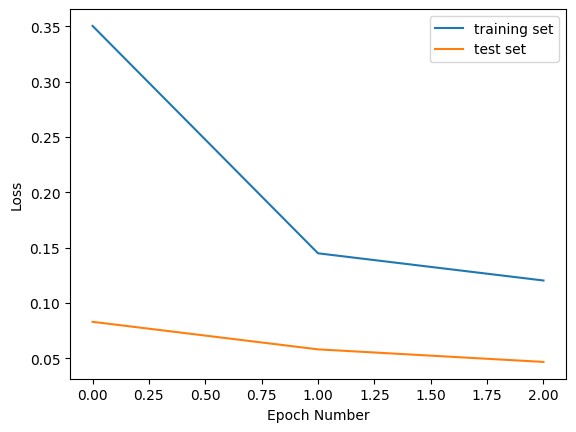

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

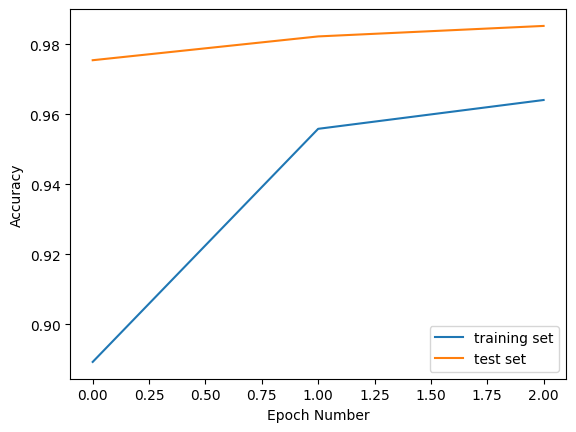

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [ ]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

RuntimeError: ignored

In [ ]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

NameError: ignored

### Test set accuracy

In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.22865954041481018
Validation accuracy:  0.9617000222206116


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model should be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

Make sure to also save the ConvNet model in a different file!

In [ ]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

## Use Each of the models (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

Note: the current code only predicts with the MLP model. Extend to use convnet also

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 [==============================] - 1s 2ms/step


In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [ ]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,0.106381,0.127998,0.080908,0.067665,0.102517,0.106085,0.147755,0.084219,0.092944,0.083527
1,0.078565,0.211475,0.046499,0.067335,0.140454,0.092432,0.073220,0.106382,0.070596,0.113043
2,0.123484,0.090762,0.076256,0.077134,0.119292,0.103917,0.099615,0.110462,0.098541,0.100538
3,0.066295,0.259816,0.044203,0.045145,0.115859,0.137800,0.068842,0.088093,0.069904,0.104042
4,0.094449,0.144086,0.070021,0.063683,0.114499,0.120193,0.098365,0.109115,0.091558,0.094031
...,...,...,...,...,...,...,...,...,...,...
9995,0.071653,0.158531,0.049456,0.075202,0.189562,0.102230,0.096751,0.076953,0.099568,0.080095
9996,0.087118,0.222044,0.053258,0.073366,0.114290,0.111545,0.087309,0.074546,0.067233,0.109290
9997,0.121063,0.108120,0.099181,0.081115,0.109649,0.095992,0.105744,0.120269,0.082085,0.076783
9998,0.121581,0.127860,0.048315,0.074722,0.122051,0.101778,0.092538,0.120173,0.064681,0.126301


In [ ]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,6
1,1
2,0
3,1
4,1
...,...
9995,4
9996,1
9997,0
9998,1


So our model is predicting that the first example from the test set is `7`.

In [ ]:
print(predictions[0])

6


Let's print the first image from a test set to see if model's prediction is correct.

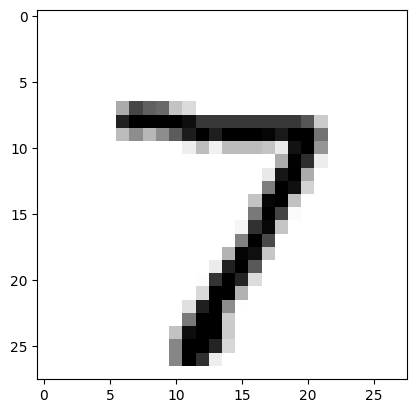

In [ ]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

<ipython-input-54-c94a8ea0f999>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


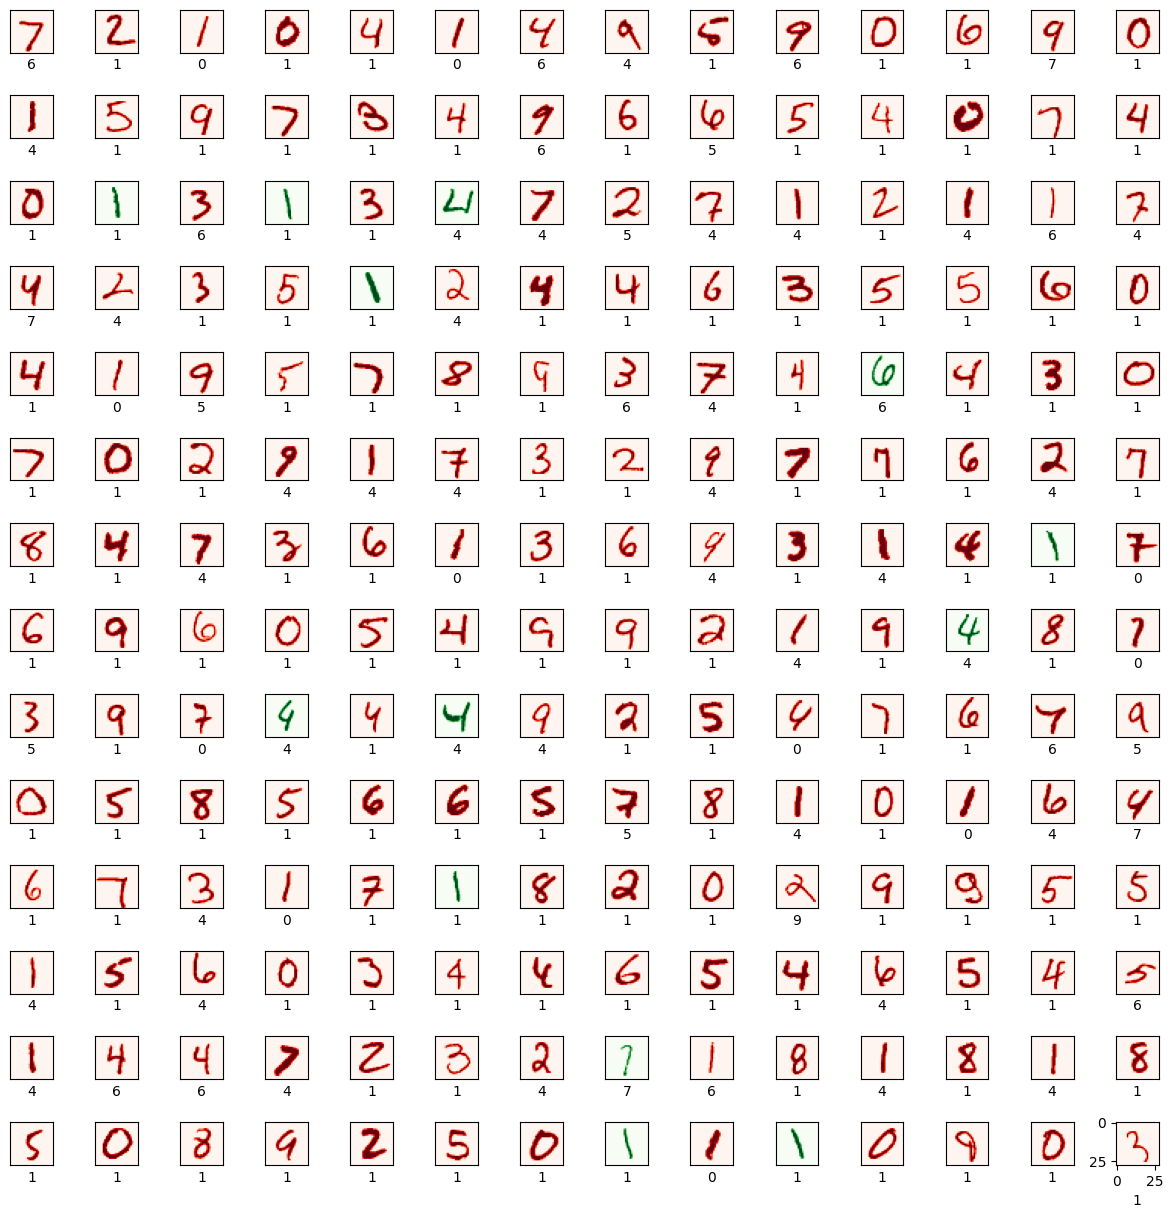

In [ ]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

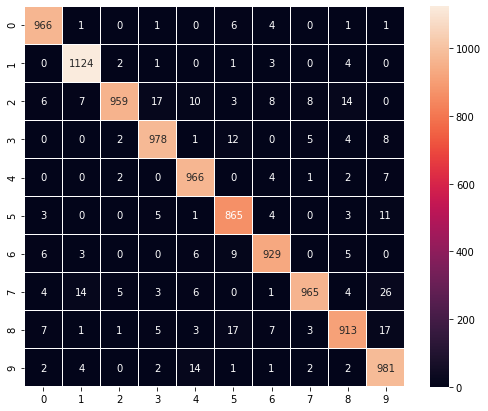

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()